<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

In [54]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [55]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [56]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [57]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

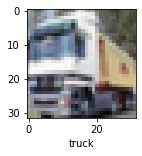

In [58]:
plot_sample(X_train, y_train, 1)

In [59]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [60]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9251 - accuracy: 0.3087
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6410 - accuracy: 0.4228
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5548 - accuracy: 0.4538
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4848 - accuracy: 0.4800
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4385 - accuracy: 0.4940


In [61]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [62]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [63]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential_13/conv2d_16/Relu (defined at <ipython-input-63-f165f7104175>:1) ]] [Op:__inference_train_function_120130]

Function call stack:
train_function


In [64]:
cnn.evaluate(X_test,y_test)

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential_13/conv2d_16/Relu (defined at <ipython-input-64-bce1cb4d24ee>:1) ]] [Op:__inference_test_function_120306]

Function call stack:
test_function


In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:

y_test[:5]

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

In [ ]:
classes[y_classes[3]]